In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Dataset_ecommerce.csv")

In [6]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [7]:
data.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [8]:
#checkin for null values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [9]:
#Mission customerID means the data is no use 
#so we have to remove those missing values
data.dropna(inplace=True)

In [10]:
#checking for missing values after dropping the missing values
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
#we need to make sure the invoice date is in date format if not convert to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
data["Country"] = data["Country"].str.strip()  # remove leading/trailing spaces
data["Country"] = data["Country"].str.upper()  # normalize case

In [14]:
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce") #making sure quantity is actually numeric

In [15]:
#Quick check to see if Country actually has multiple unique values:
print(data["Country"].value_counts())

Country
NIGERIA          14714
SIERRA LEONE     14684
SOMALIA          14656
COTE D'IVOIRE    14645
MOZAMBIQUE       14639
CAMEROON         14619
SENEGAL          14616
BENIN            14610
GHANA            14604
LIBYA            14585
ZIMBABWE         14572
ETHIOPIA         14565
RWANDA           14563
TOGO             14560
MOROCCO          14530
SUDAN            14530
KENYA            14525
ALGERIA          14492
SOUTH AFRICA     14469
EGYPT            14456
NIGER            14455
TUNISIA          14452
UGANDA           14450
BURKINA FASO     14413
ZAMBIA           14397
TANZANIA         14390
MALI             14319
MADAGASCAR       14319
Name: count, dtype: int64


# Exploratory Data Analysis
Analysis by Country

In [16]:
quantity_by_country = data.groupby("Country", as_index=False)["Quantity"].sum()
print(quantity_by_country)

          Country  Quantity
0         ALGERIA    736181
1           BENIN    738133
2    BURKINA FASO    728332
3        CAMEROON    730881
4   COTE D'IVOIRE    740229
5           EGYPT    729299
6        ETHIOPIA    732940
7           GHANA    735354
8           KENYA    732247
9           LIBYA    739206
10     MADAGASCAR    726297
11           MALI    732358
12        MOROCCO    732594
13     MOZAMBIQUE    735416
14          NIGER    725841
15        NIGERIA    739708
16         RWANDA    733511
17        SENEGAL    733968
18   SIERRA LEONE    735477
19        SOMALIA    736219
20   SOUTH AFRICA    740589
21          SUDAN    734158
22       TANZANIA    725664
23           TOGO    741223
24        TUNISIA    733082
25         UGANDA    724525
26         ZAMBIA    725152
27       ZIMBABWE    737522


In [17]:
#Arrange in descending order
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False)

In [18]:
quantity_by_country

,Country,Quantity
23,TOGO,741223
20,SOUTH AFRICA,740589
4,COTE D'IVOIRE,740229
15,NIGERIA,739708
9,LIBYA,739206
1,BENIN,738133
27,ZIMBABWE,737522
19,SOMALIA,736219
0,ALGERIA,736181
18,SIERRA LEONE,735477


In [19]:
top_10_Countries = quantity_by_country.head(10)

In [20]:
top_10_Countries

,Country,Quantity
23,TOGO,741223
20,SOUTH AFRICA,740589
4,COTE D'IVOIRE,740229
15,NIGERIA,739708
9,LIBYA,739206
1,BENIN,738133
27,ZIMBABWE,737522
19,SOMALIA,736219
0,ALGERIA,736181
18,SIERRA LEONE,735477


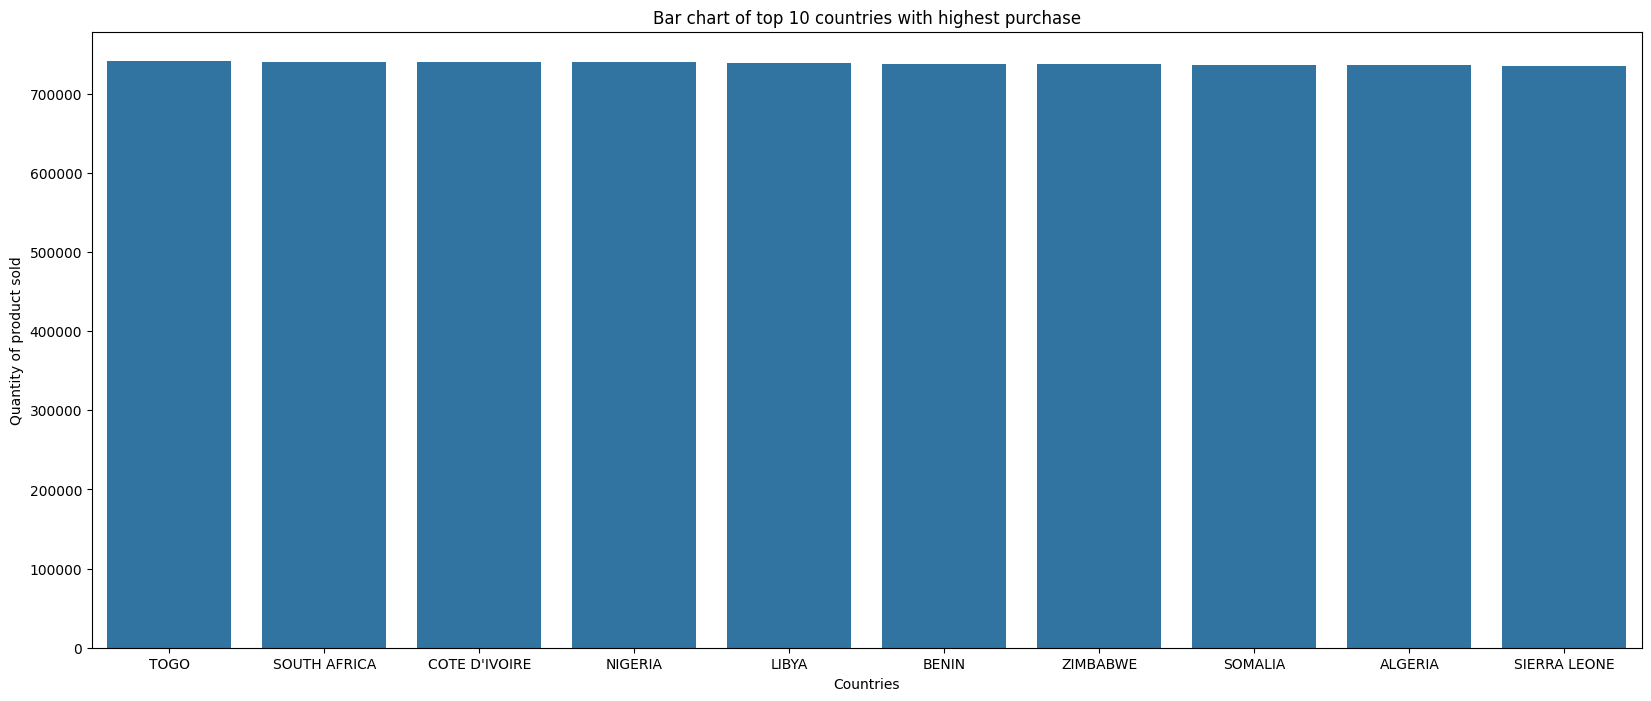

In [21]:
#Visualize Top 10 countries with quantity sold
top_10_Countries = quantity_by_country.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_Countries)
plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of top 10 countries with highest purchase")
plt.show()

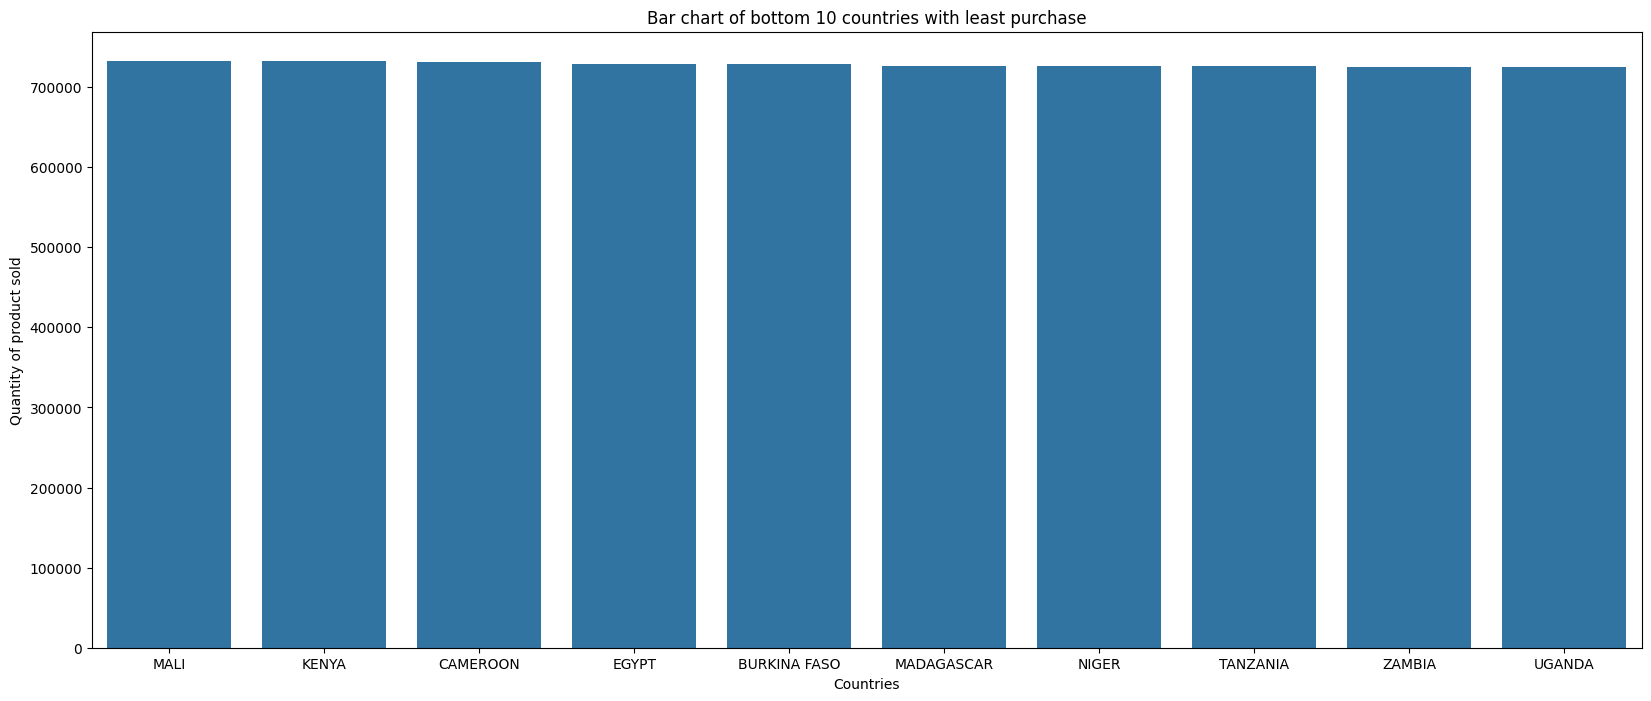

In [22]:
#Visualize least 10 countries with quantity sold
least_10_Countries = quantity_by_country.tail(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_Countries)
plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of bottom 10 countries with least purchase")
plt.show()

# Analysis of countries and numbers of customers

In [23]:
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer.head(3)

,Country,CustomerID
0,ALGERIA,3043
1,BENIN,3054
2,BURKINA FASO,3049


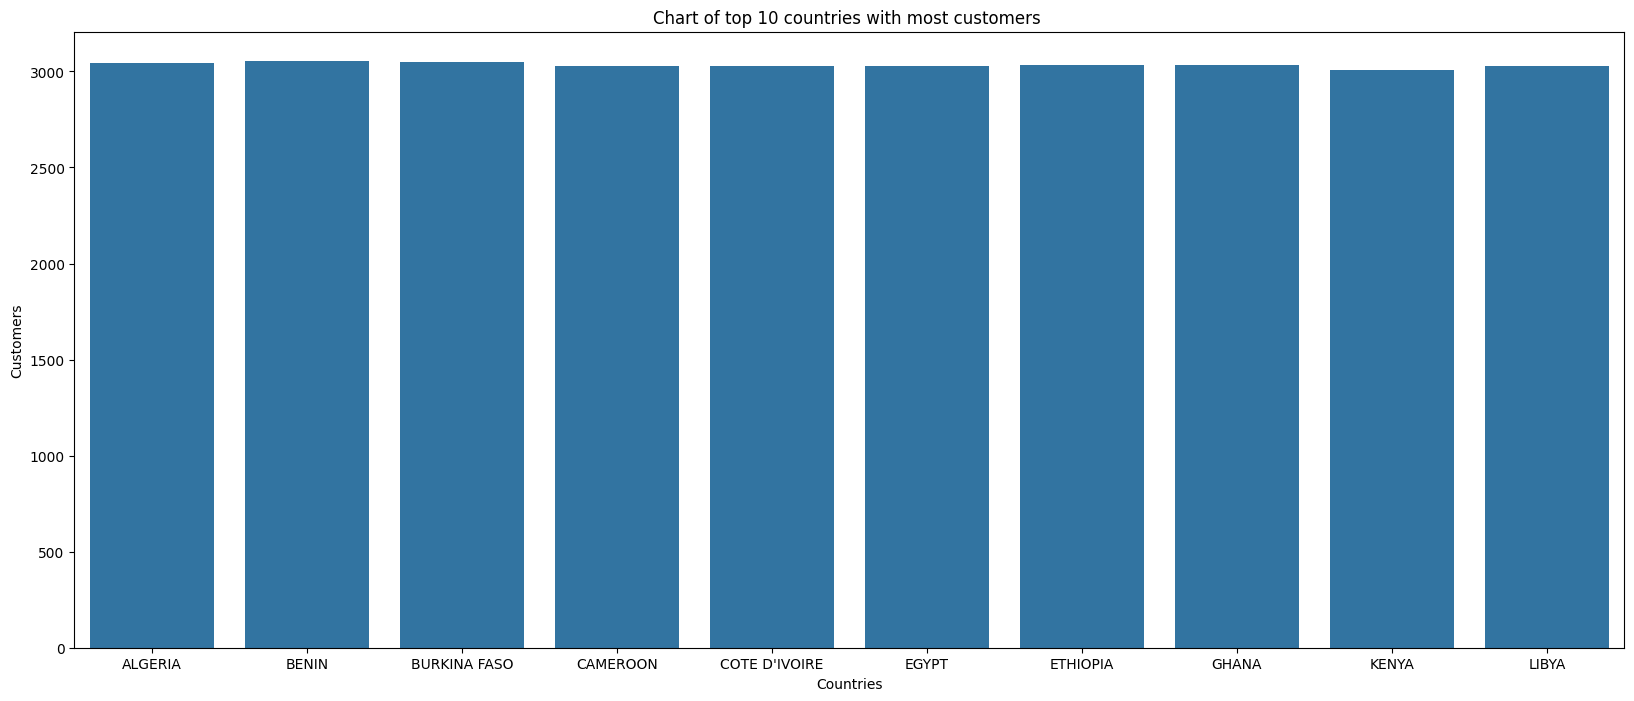

In [24]:
top_countries_to_customers=country_to_customer.head(10)

plt.figure(figsize=(20,8))
sns.barplot(x="Country", y="CustomerID", data =top_countries_to_customers )
plt.xlabel("Countries")
plt.ylabel("Customers")
plt.title("Chart of top 10 countries with most customers ")
plt.show()

In [25]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()

In [26]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

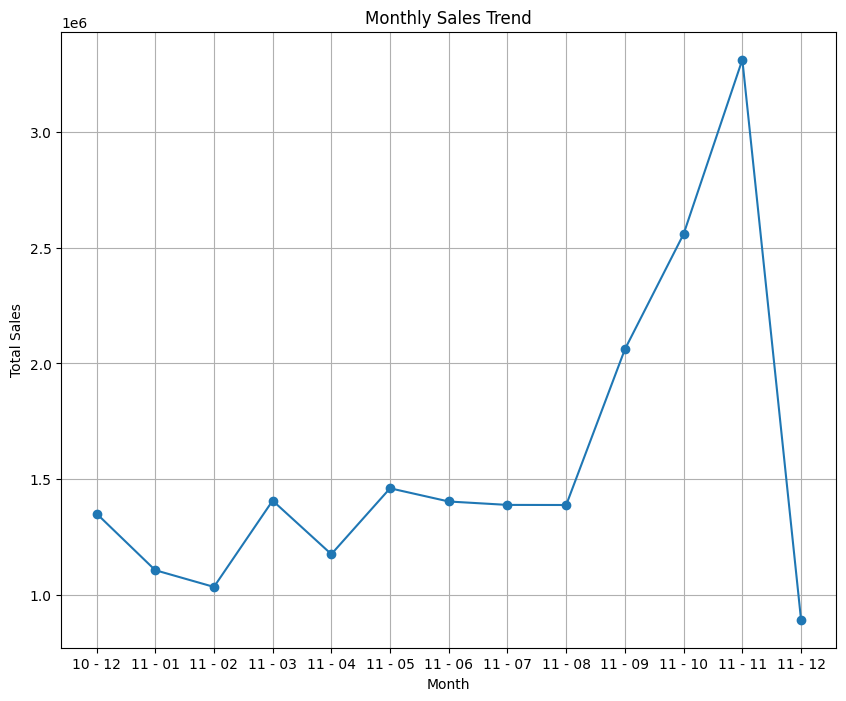

In [27]:
plt.figure(figsize=(10,8))
plt.plot(monthly_sales.index.strftime("%y - %m"), monthly_sales.values, marker = 'o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

# Cohort Analysis

In [28]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,EGYPT
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,MALI
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,MALI
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,SOUTH AFRICA
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,RWANDA


In [29]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [30]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [31]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,EGYPT
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,MALI
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,MALI
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,SOUTH AFRICA
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,RWANDA


In [32]:
#This function groups the customerID by invoice date and picks the minimum date. 
#The minimum date indicates the first purchase made by the customer
def get_cohort_date(data):
    data["cohort_date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min") 
    return data["cohort_date"]

In [33]:
data["cohort_date"] = get_cohort_date(data)

In [34]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,EGYPT,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,MALI,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,MALI,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,SOUTH AFRICA,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,RWANDA,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,MOZAMBIQUE,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,TUNISIA,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,SOMALIA,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,SENEGAL,2011-08-01


# Cohort Index

In [35]:
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month,year

In [36]:
first_month,first_year = get_year_and_month(data,  "cohort_date") #cohort date has the first month and year for customer

In [37]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

In [38]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

In [39]:
latest_month,latest_year=get_year_and_month(data, "InvoiceDate") #invoice date has the latest dates

In [40]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [41]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [42]:
def create_cohort_index(first_month,first_year,latest_month,latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    return year_diff * 12 + month_diff + 1 #Adding 1 so customers who only have 1 purchase with 0 difference will return 1

In [43]:
data["cohort_index"] = create_cohort_index(first_month,first_year,latest_month,latest_year)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,EGYPT,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,MALI,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,MALI,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,SOUTH AFRICA,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,RWANDA,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,MOZAMBIQUE,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,TUNISIA,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,SOMALIA,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,SENEGAL,2011-08-01,5


# Cohort Table

In [48]:
cohort_info = data.groupby(["cohort_date", "cohort_index"])["CustomerID"].nunique().reset_index()

In [49]:
cohort_info

,cohort_date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [54]:
cohort_info.rename(columns = {"CustomerID": "Number Of Customers"},  inplace = True)

In [55]:
cohort_info

,cohort_date,cohort_index,Number Of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [56]:
cohort_table = cohort_info.pivot(index="cohort_date", columns= ["cohort_index"], values = "Number Of Customers")

In [57]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cohort_table.index = cohort_table.index.strftime("%B %Y") #format the cohort_date to be more interpretable 

In [59]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

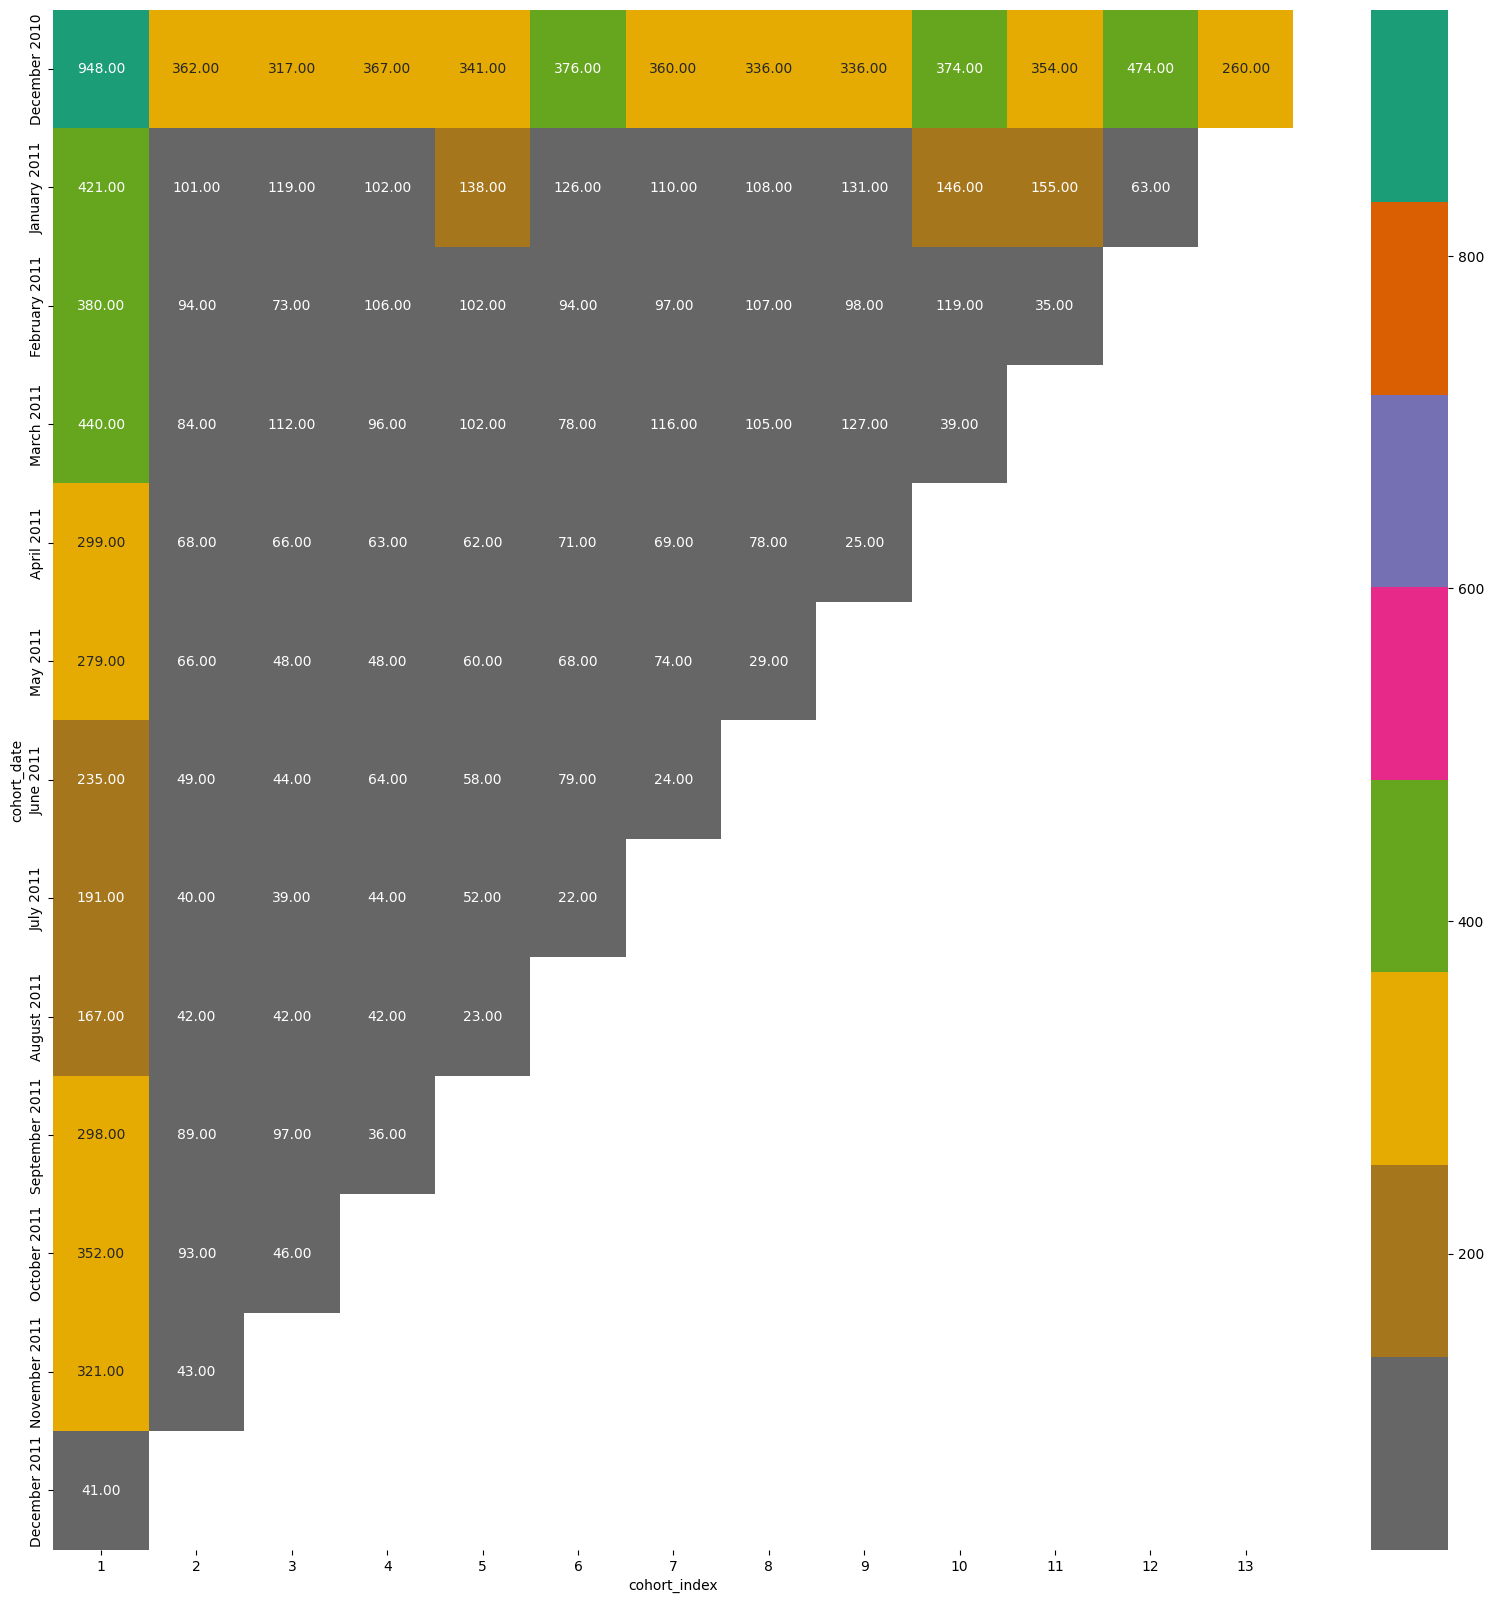

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(cohort_table,annot=True,cmap="Dark2_r",fmt=".2f")

In [71]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)

In [72]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

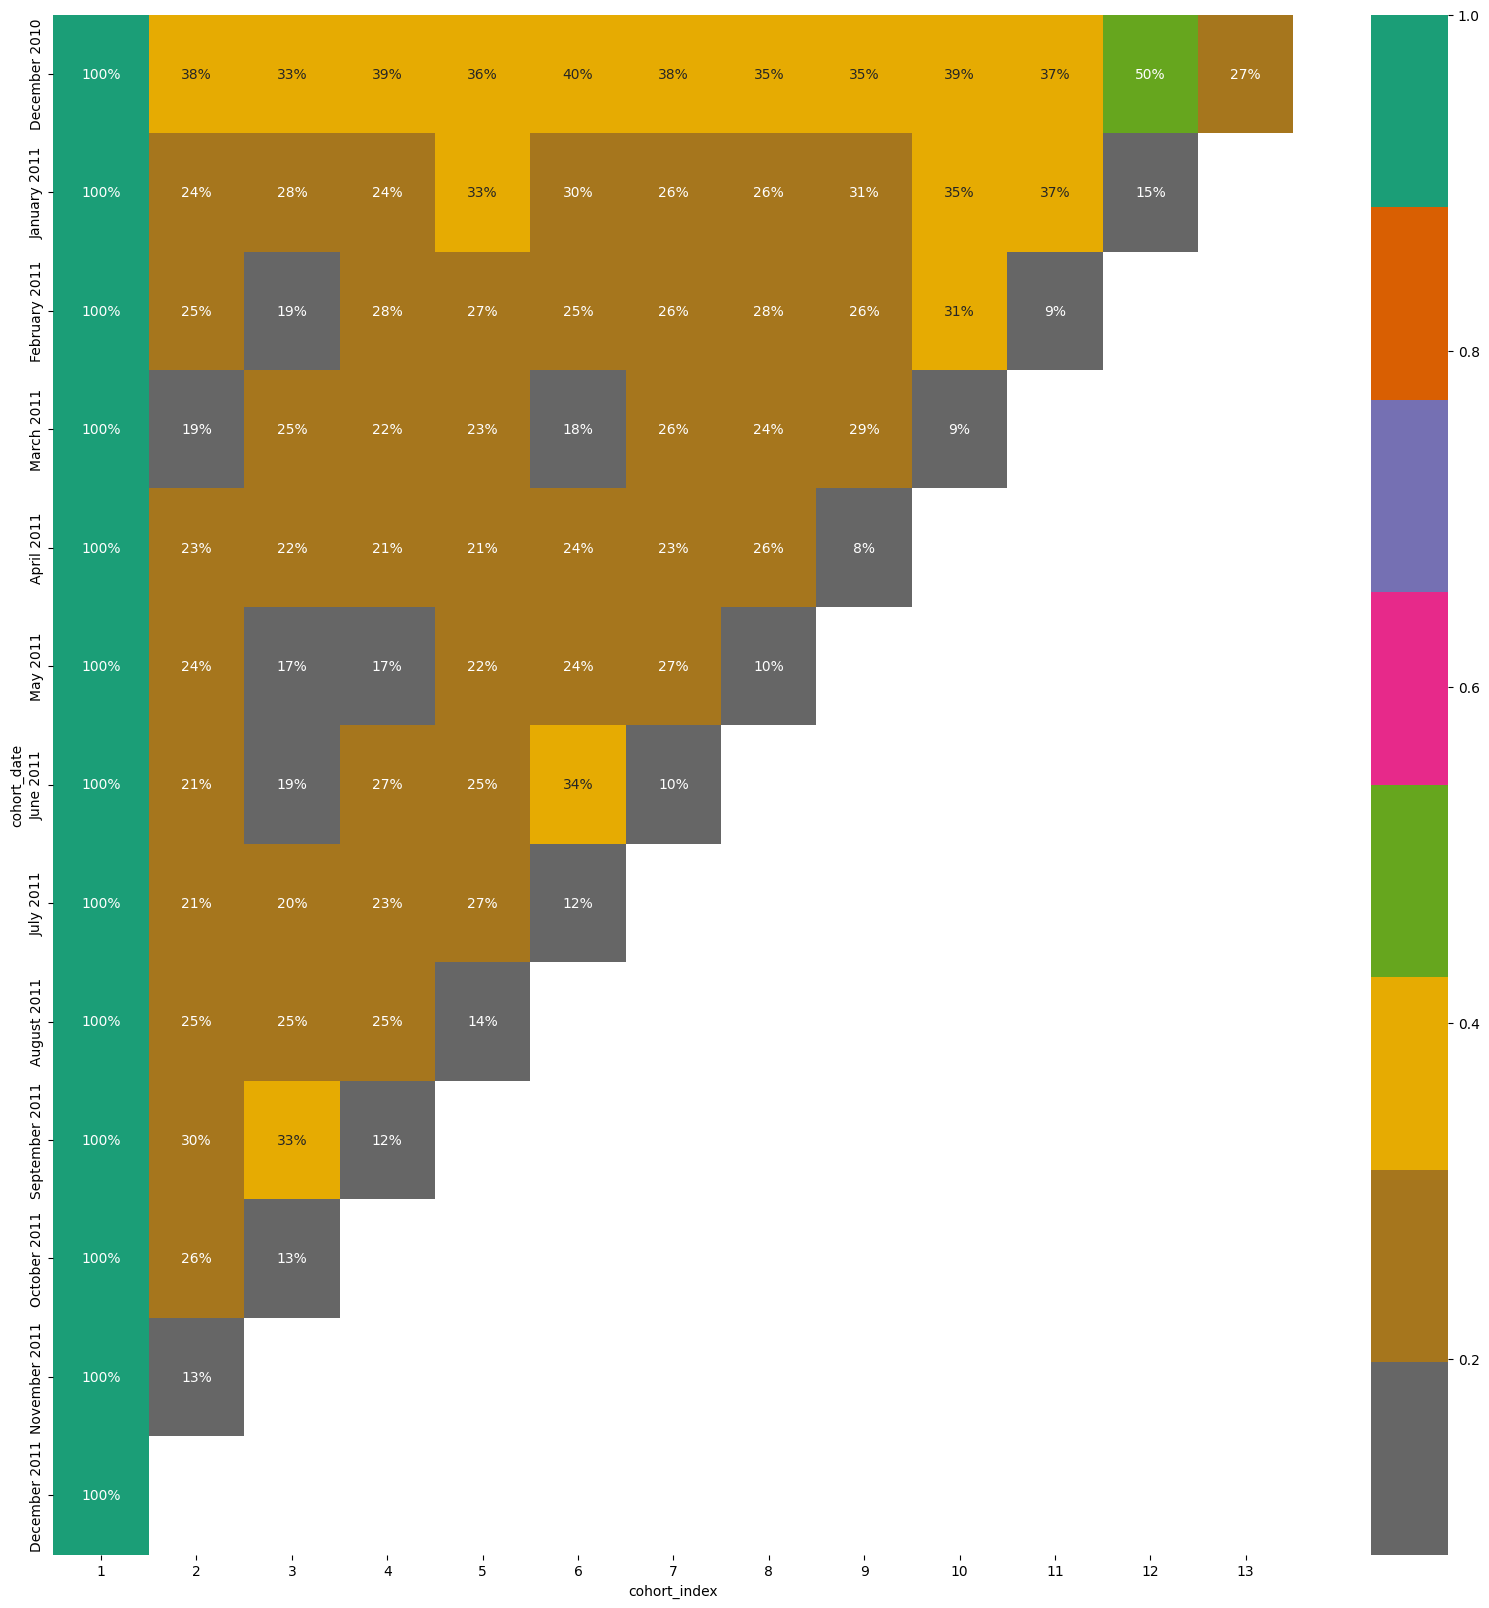

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(new_cohort_table,annot=True,cmap="Dark2_r",fmt=".0%")

In [95]:
quantity_bought = data.groupby(["cohort_date", "cohort_index"])["Quantity"].sum().reset_index()

In [96]:
quantity_bought

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [99]:
quantity_table = quantity_bought.pivot(index="cohort_date", columns= ["cohort_index"], values = "Quantity")

In [102]:
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [103]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

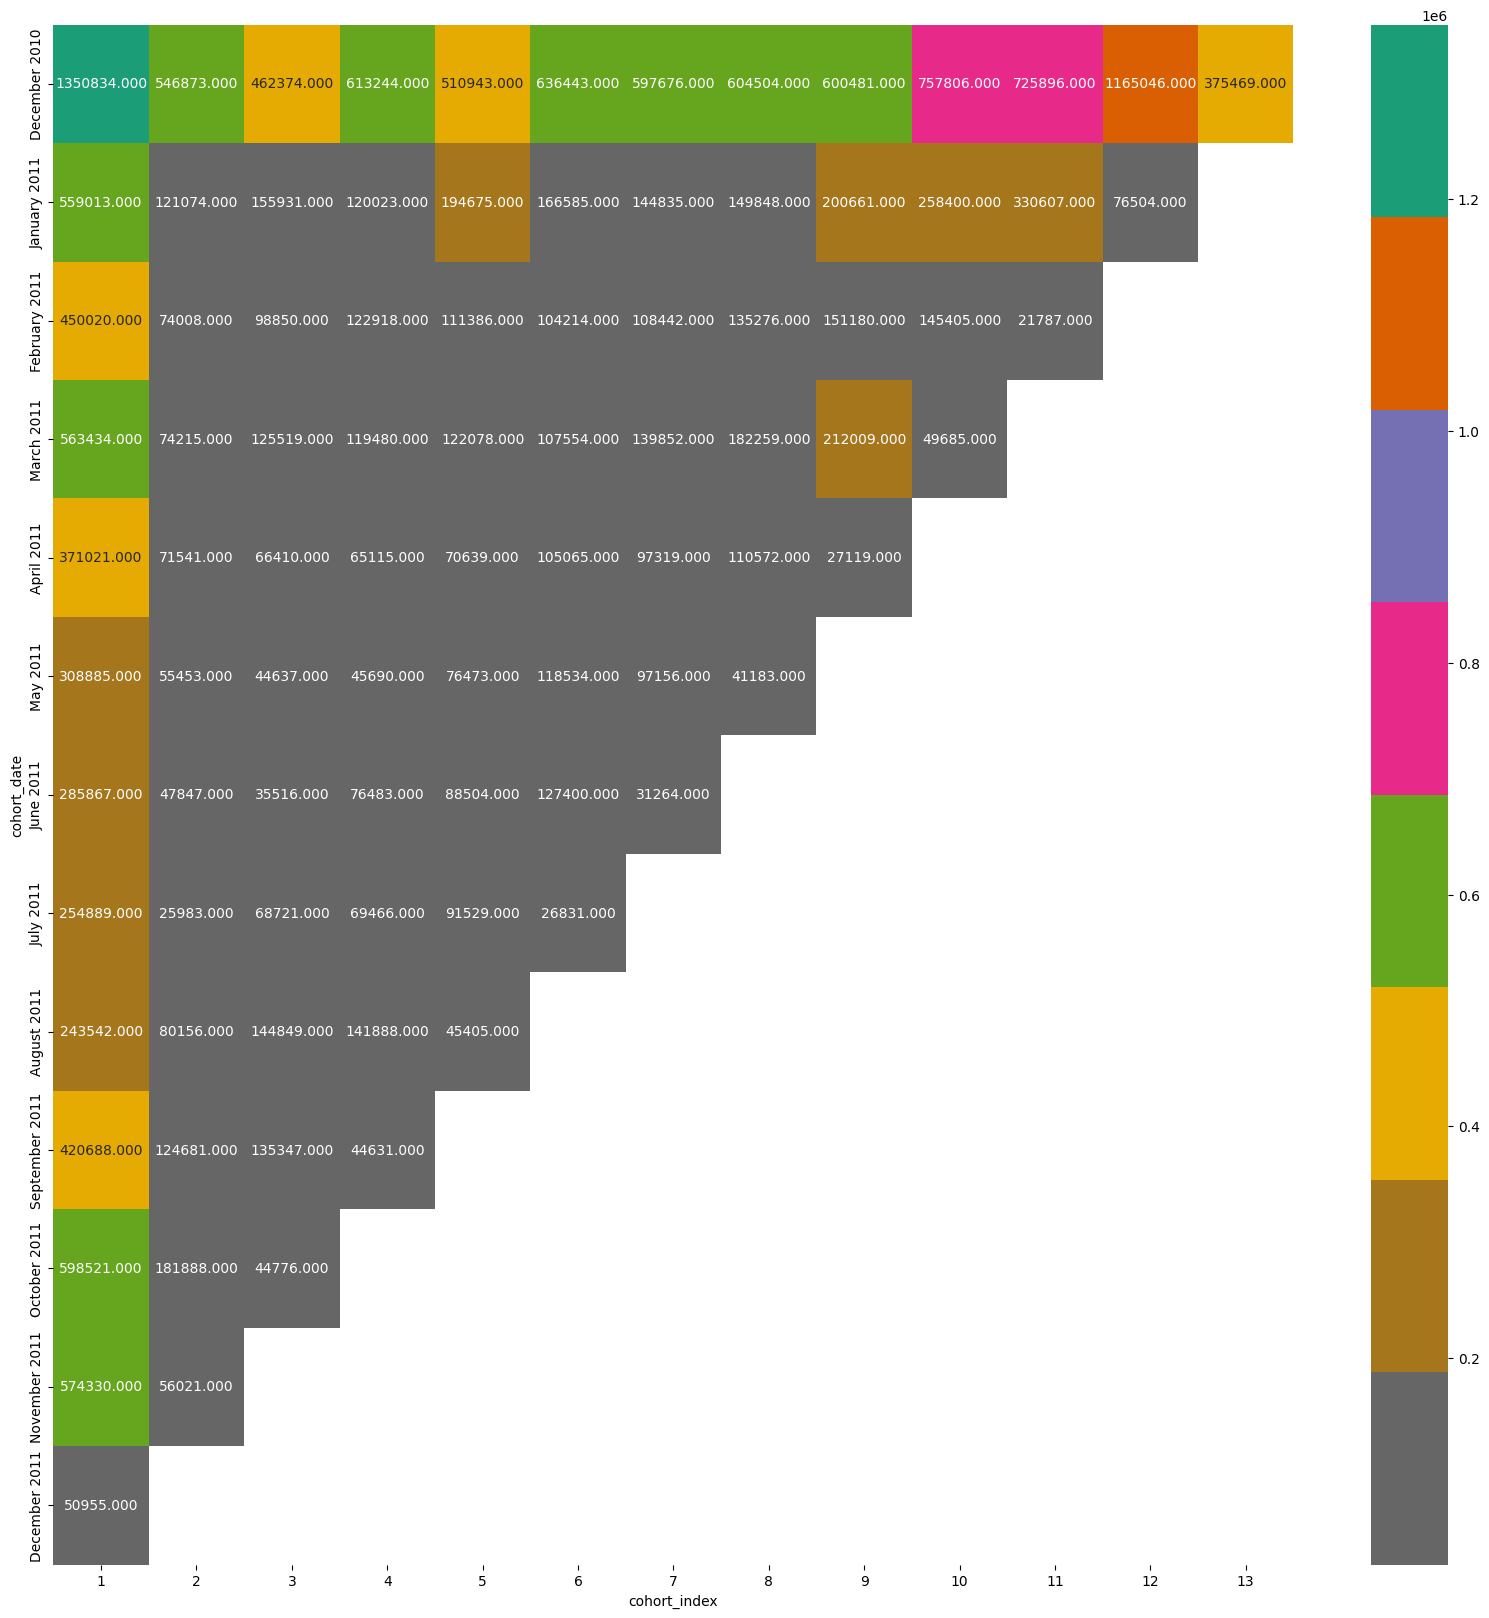

In [107]:
plt.figure(figsize =(20,20))
sns.heatmap(quantity_table,annot=True,cmap="Dark2_r",fmt=".3f")